In [8]:
import numpy as np
import pandas as pd 

df = pd.read_csv('seattle_collision_data_2005_2019.csv')
df.head()

##see if commit worked

,Unnamed: 0,longitude,latitude,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,...,response_type,response_time,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WSF5
0,1,-122.324322,47.613755,0,Parked Car,2,0,0,2,0,...,NaN,NaN,9.4,0.0,NaN,NaN,33.0,38,27,17.0
1,2,-122.321556,47.571558,0,Rear Ended,3,0,0,3,0,...,NaN,NaN,9.4,0.0,NaN,NaN,33.0,38,27,17.0
2,3,-122.344164,47.555769,1,Head On,2,0,0,2,1,...,NaN,NaN,9.4,0.0,NaN,NaN,33.0,38,27,17.0
3,4,-122.309400,47.608484,1,Rear Ended,2,0,0,2,1,...,Motor Vehicle Accident,36.0,9.4,0.0,NaN,NaN,33.0,38,27,17.0
4,5,-122.319746,47.674521,0,Left Turn,2,0,0,2,0,...,NaN,NaN,9.4,0.0,NaN,NaN,33.0,38,27,17.0


In [4]:
print(df.dtypes)
print('===========')
print(df.info())

Unnamed: 0                int64
longitude               float64
latitude                float64
SEVERITYCODE              int64
COLLISIONTYPE            object
PERSONCOUNT               int64
PEDCOUNT                  int64
PEDCYLCOUNT               int64
VEHCOUNT                  int64
INJURIES                  int64
SERIOUSINJURIES           int64
FATALITIES                int64
JUNCTIONTYPE             object
INATTENTIONIND             bool
UNDERINFL                  bool
WEATHER                  object
ROADCOND                 object
LIGHTCOND                 int64
SPEEDING                   bool
HITPARKEDCAR               bool
SPDCASENO                object
DATE                     object
TIME                    float64
intersection_related       bool
response_type            object
response_time           float64
AWND                    float64
PRCP                    float64
SNOW                    float64
SNWD                    float64
TAVG                    float64
TMAX    

In [ ]:
## !! we need to impute the data for missing values !!
## she showed them in class

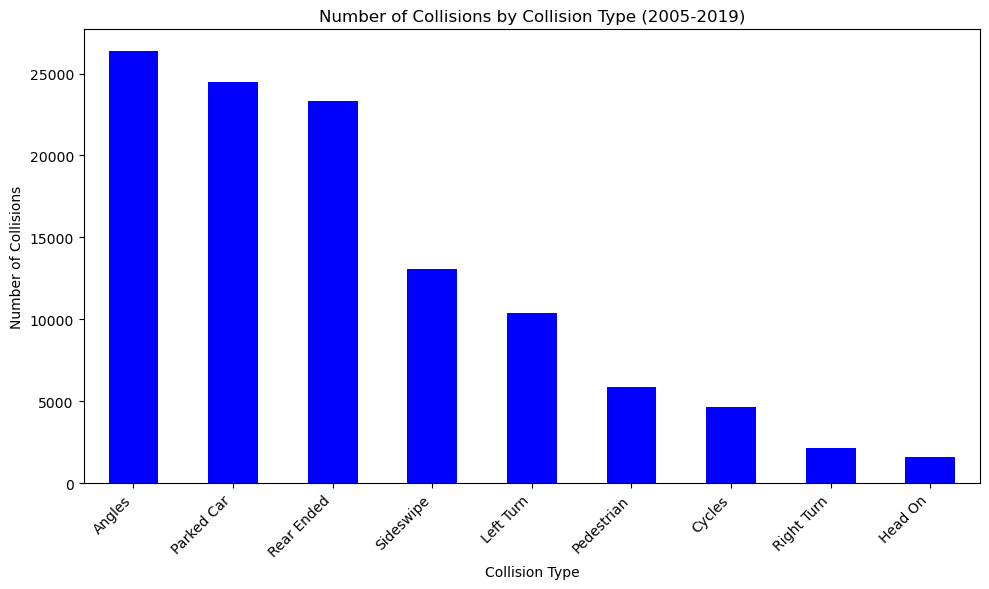

In [3]:
import matplotlib.pyplot as plt


# Count the occurrences of each collision type
collision_type_counts = df['COLLISIONTYPE'].value_counts()

# Create the bar graph
plt.figure(figsize=(10, 6))
collision_type_counts.plot(kind='bar', color='blue')
plt.title('Number of Collisions by Collision Type (2005-2019)')
plt.xlabel('Collision Type')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 

# Show the plot
plt.show()


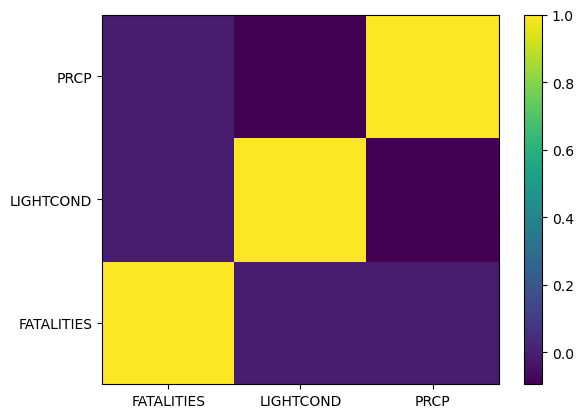

In [6]:
# plot the correlation matrix 
vars_to_use = ['FATALITIES', 'LIGHTCOND', 'PRCP'] # pick vars
plt.pcolor(df[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

In [10]:
import folium


fatal_accidents = df[df['FATALITIES'] > 0]

# Assuming 'latitude' and 'longitude' are the column names for latitude and longitude data
# and ensuring these columns don't contain missing values
fatal_accidents = fatal_accidents.dropna(subset=['latitude', 'longitude'])

# Create a map centered around an average location of the fatal accidents
map_center = [fatal_accidents['latitude'].mean(), fatal_accidents['longitude'].mean()]
fatal_accident_map = folium.Map(location=map_center, zoom_start=12)

# Add fatal accident locations to the map
for idx, row in fatal_accidents.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,  # Increased radius for better visibility
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7
    ).add_to(fatal_accident_map)

# Display the map
fatal_accident_map



In [ ]:
import pandas as pd